In [1]:
#Step 1: Data Cleaning & Preprocessing 

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Load data
df = pd.read_csv('SuperMarket_sales.csv')

In [9]:
# Check basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [10]:
# print First 5 rows
print(df.head())  

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.1415   
1  10:29

In [11]:
# print last 5 rows
print(df.tail())  

      Invoice ID Branch       City Customer type  Gender         Product line  \
995  233-67-5758   Giza  Naypyitaw        Normal    Male    Health and beauty   
996  303-96-2227  Cairo   Mandalay        Normal  Female   Home and lifestyle   
997  727-02-1313   Alex     Yangon        Member    Male   Food and beverages   
998  347-56-2442   Alex     Yangon        Normal    Male   Home and lifestyle   
999  849-09-3807   Alex     Yangon        Member  Female  Fashion accessories   

     Unit price  Quantity   Tax 5%      Sales       Date        Time  Payment  \
995       40.35         1   2.0175    42.3675  1/29/2019  1:46:00 PM  Ewallet   
996       97.38        10  48.6900  1022.4900   3/2/2019  5:16:00 PM  Ewallet   
997       31.84         1   1.5920    33.4320   2/9/2019  1:22:00 PM     Cash   
998       65.82         1   3.2910    69.1110  2/22/2019  3:33:00 PM     Cash   
999       88.34         7  30.9190   649.2990  2/18/2019  1:28:00 PM     Cash   

       cogs  gross margin 

In [88]:
# To check how many missing (NaN) values are present in each column
print(df.isnull().sum())


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [89]:
# Convert 'Date' column from string/object type to proper datetime format (MM/DD/YYYY)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [90]:
# Remove duplicate rows based only on 'Invoice ID'
df.drop_duplicates(subset=['Invoice ID'], inplace=True)


In [91]:
# Extract month, day, year, and weekday name from 'Date' column
df['Month'] = df['Date'].dt.month



In [92]:
df['Day'] = df['Date'].dt.day


In [93]:
df['Year'] = df['Date'].dt.year


In [94]:
df['DayName'] = df['Date'].dt.day_name()

In [95]:
# Convert 'Time' string to datetime and extract hour part for time-based analysis
# Using explicit format '%H:%M:%S' to avoid warnings and ensure parsing consistency
# 'errors=coerce' will insert NaN for any values that cannot be converted
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

In [96]:
# Check unique values for categorical columns
print(df['City'].unique())


['Yangon' 'Naypyitaw' 'Mandalay']


In [97]:
print(df['Product line'].unique())

['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


In [98]:
#Step 2: Exploratory Data Analysis (EDA)
#a. Summary Statistics
df.describe()

,Unit price,Quantity,Tax 5%,Sales,Date,cogs,gross margin percentage,gross income,Rating,Month,Day,Year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,0.0
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270,1.993000,15.256000,2019.0,NaN
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,NaN
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000,1.000000,8.000000,2019.0,NaN
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000,2.000000,15.000000,2019.0,NaN
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000,3.000000,23.000000,2019.0,NaN
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000,3.000000,31.000000,2019.0,NaN
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858,0.835254,8.693563,0.0,NaN


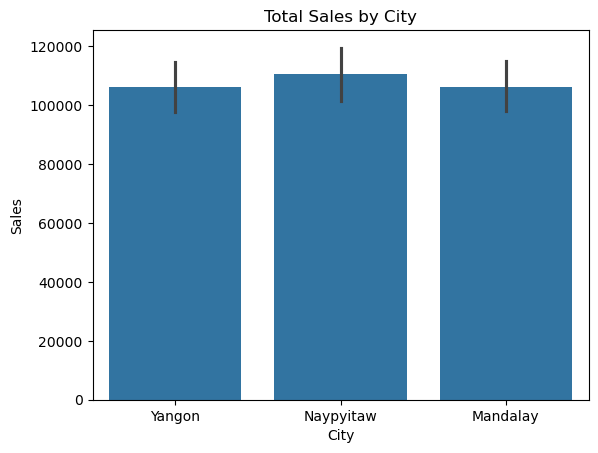

In [99]:
# Data Visualization
#Sales by City
sns.barplot(x='City', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by City')
plt.show()

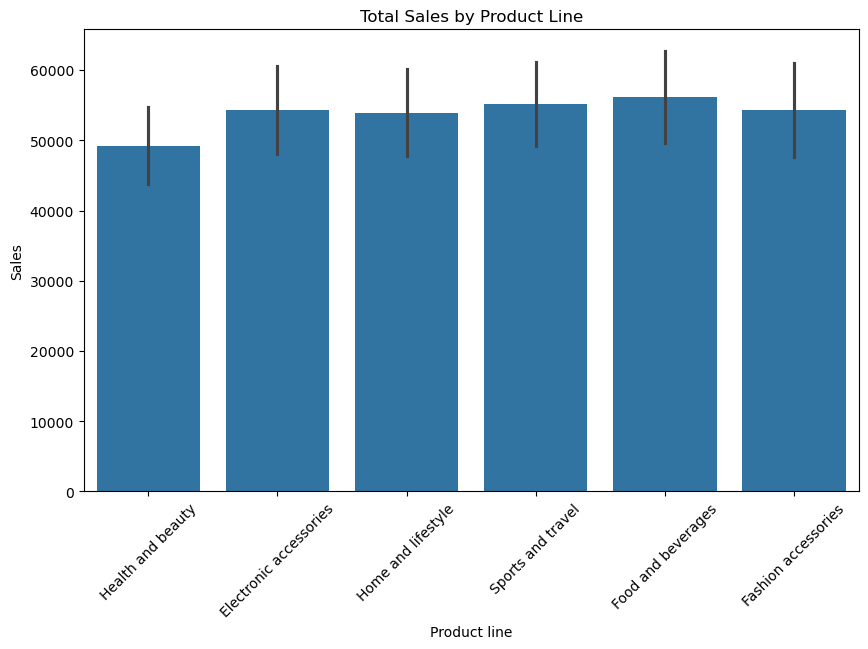

In [100]:
#Sales by Product Line
plt.figure(figsize=(10,6))
sns.barplot(x='Product line', y='Sales', data=df, estimator=sum)
plt.xticks(rotation=45)
plt.title('Total Sales by Product Line')
plt.show()

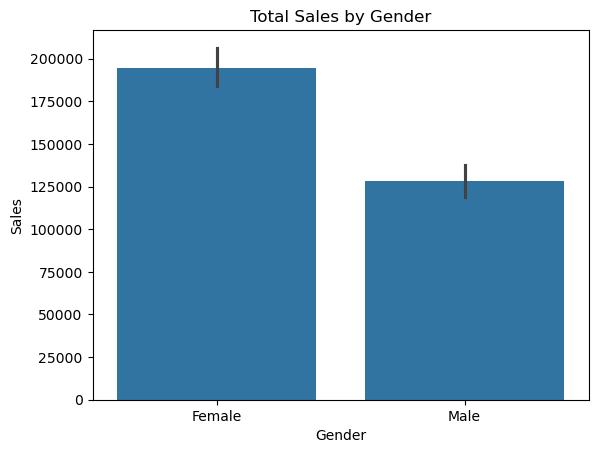

In [101]:
#Sales by Gender
sns.barplot(x='Gender', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Gender')
plt.show()

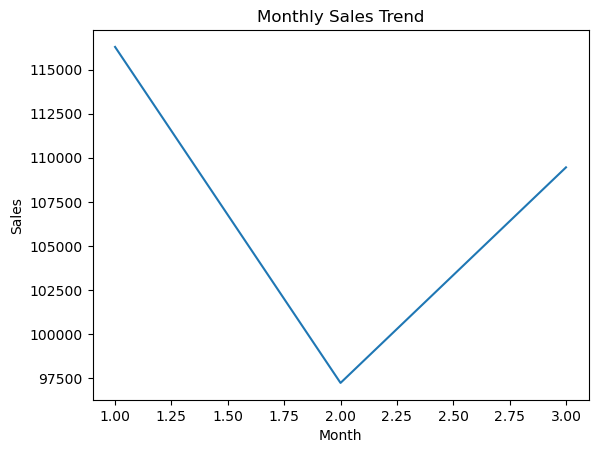

In [102]:
#Monthly Sales Trend
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
sns.lineplot(x='Month', y='Sales', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.show()

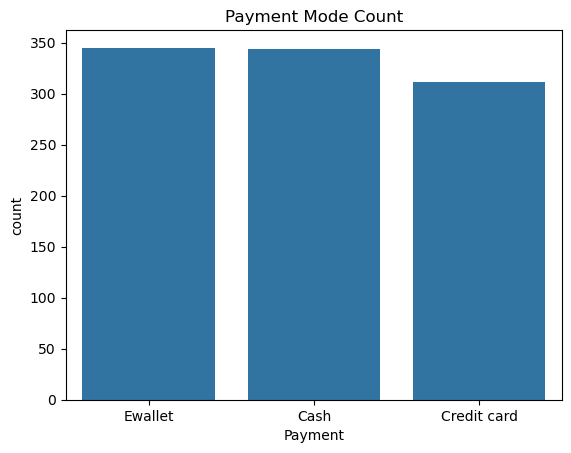

In [103]:
#Payment Mode Preference
sns.countplot(x='Payment', data=df)
plt.title('Payment Mode Count')
plt.show()

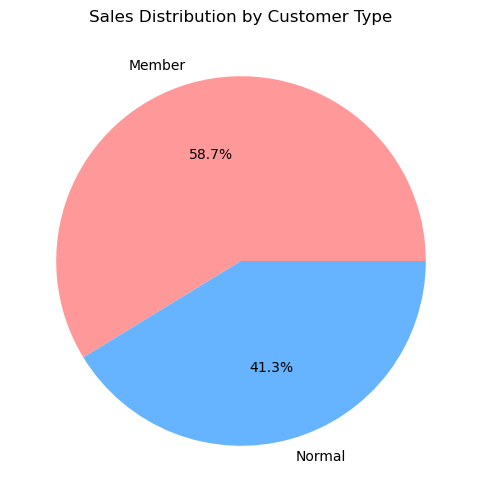

In [106]:
#Sales Analysis by Customer Type
plt.figure(figsize=(8, 6))
customer_sales = df.groupby('Customer type')['Sales'].sum()
plt.pie(customer_sales.values, labels=customer_sales.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Sales Distribution by Customer Type')
plt.show()

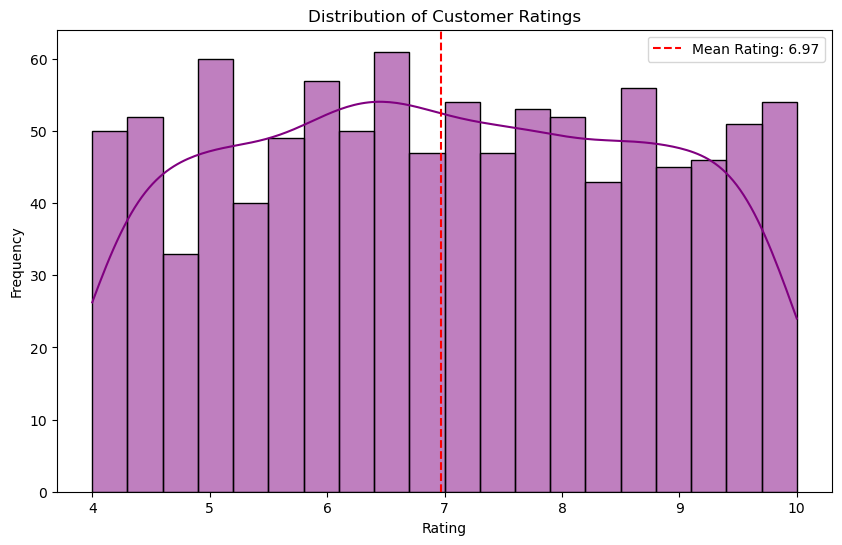

In [108]:
#Rating Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.axvline(df['Rating'].mean(), color='red', linestyle='--', label=f'Mean Rating: {df["Rating"].mean():.2f}')
plt.legend()
plt.show()


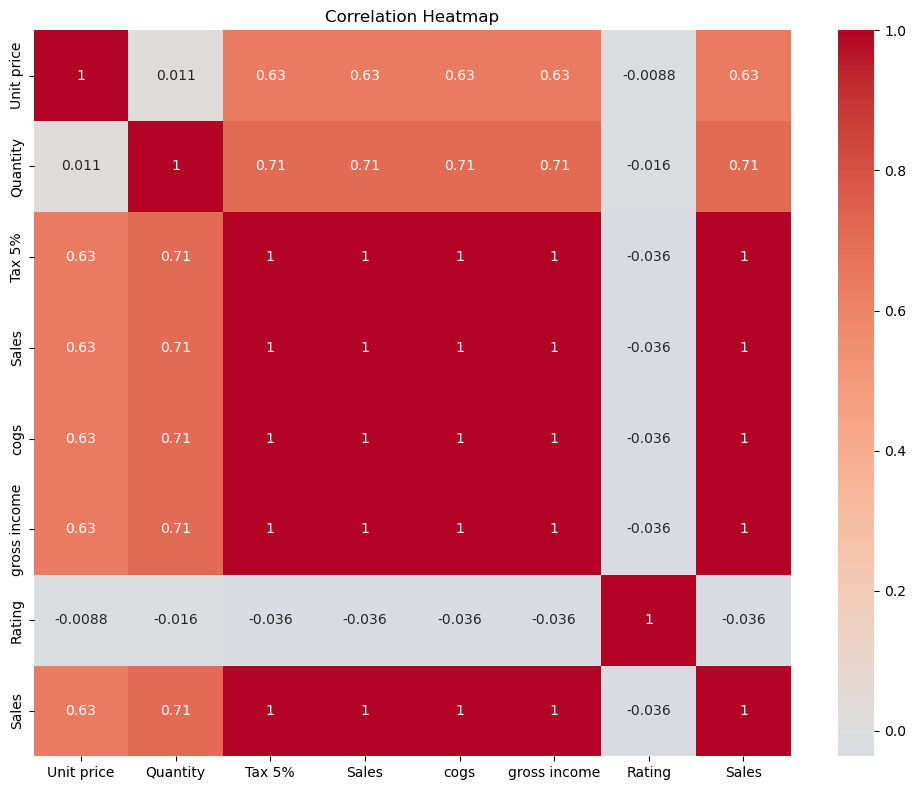

In [104]:
# 7. Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs', 'gross income', 'Rating', 'Sales']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()


In [111]:
# Save Cleaned Data into CSV
df.to_csv('cleaned_sales_data.csv', index=False)

In [112]:
import os



In [113]:
# Check if file exists
if os.path.exists('cleaned_sales_data.csv'):
    print("File successfully saved!")
   

File successfully saved!
